In [17]:
#调入需要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
u=df['Age'].mean()#计算均值

In [4]:
#建立原始数据数组
age_data = [13, 15, 16, 16, 19, 20, 20, 21, 22, 22, 25, 25, 25, 30, 33, 33, 35, 35, 36, 40, 45, 46, 52, 70]

# 转换为DataFrame便于处理
df = pd.DataFrame(age_data, columns=['Age'])
df

Age
0    13
1    15
2    16
3    16
4    19
5    20
6    20
7    21
8    22
9    22
10   25
11   25
12   25
13   30
14   33
15   33
16   35
17   35
18   36
19   40
20   45
21   46
22   52
23   70

In [6]:
#(1)等宽分箱（分成3个箱）
df['Bin'] = pd.cut(df['Age'], bins=3, labels=['Bin1', 'Bin2', 'Bin3'])

C:\Users\gaoyang\AppData\Local\Temp\ipykernel_28168\2805271863.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = df.groupby('Bin')['Age'].mean()
C:\Users\gaoyang\AppData\Local\Temp\ipykernel_28168\2805271863.py:23: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\gaoyang\AppData\Local\Temp\ipykernel_28168\2805271863.py:23: UserWarning: Glyph 31665 (\N{CJK UNIFIED IDEOGRAPH-7BB1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\gaoyang\AppData\Local\Temp\ipykernel_28168\2805271863.py:23: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\gaoyang\AppData\Local\Temp\ipykernel_28168\2805271863.py:23: UserWarning: Glyph 40836 (\N{CJK 

<Figure size 1000x600 with 0 Axes>

C:\Users\gaoyang\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gaoyang\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 40836 (\N{CJK UNIFIED IDEOGRAPH-9F84}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gaoyang\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21508 (\N{CJK UNIFIED IDEOGRAPH-5404}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gaoyang\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gaoyang\AppData\Local\Progr

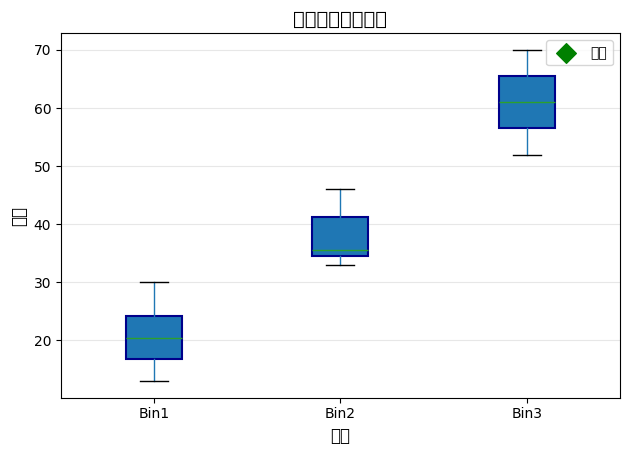

In [7]:
#绘制分箱后的箱型图
#设置画布尺寸
plt.figure(figsize=(10, 6))

# 绘制每个箱的箱型图
boxprops = dict(linestyle='-', linewidth=1.5, color='darkblue')
flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none')

df.boxplot(column='Age', by='Bin', grid=False, 
           boxprops=boxprops, flierprops=flierprops,
           patch_artist=True)

plt.title('各分箱的年龄分布', fontsize=14)
plt.suptitle('')  # 移除自动生成的标题
plt.xlabel('分箱', fontsize=12)
plt.ylabel('年龄', fontsize=12)
plt.grid(True, axis='y', alpha=0.3)

# 添加均值线
means = df.groupby('Bin')['Age'].mean()
for i, mean in enumerate(means):
    plt.scatter(i+1, mean, color='green', s=100, marker='D', label='均值' if i == 0 else "")
    
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
# 计算每个箱的均值
bin_means = df.groupby('Bin')['Age'].mean().to_dict()
# 用箱均值平滑数据
df['Smoothed_Age'] = df['Bin'].map(bin_means)

C:\Users\gaoyang\AppData\Local\Temp\ipykernel_28168\2957726462.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_means = df.groupby('Bin')['Age'].mean().to_dict()


In [11]:
#展示平滑后的数据
print("原始数据与平滑后数据:")
print(df[['Age', 'Bin', 'Smoothed_Age']])

原始数据与平滑后数据:
    Age   Bin Smoothed_Age
0    13  Bin1    20.642857
1    15  Bin1    20.642857
2    16  Bin1    20.642857
3    16  Bin1    20.642857
4    19  Bin1    20.642857
5    20  Bin1    20.642857
6    20  Bin1    20.642857
7    21  Bin1    20.642857
8    22  Bin1    20.642857
9    22  Bin1    20.642857
10   25  Bin1    20.642857
11   25  Bin1    20.642857
12   25  Bin1    20.642857
13   30  Bin1    20.642857
14   33  Bin2    37.875000
15   33  Bin2    37.875000
16   35  Bin2    37.875000
17   35  Bin2    37.875000
18   36  Bin2    37.875000
19   40  Bin2    37.875000
20   45  Bin2    37.875000
21   46  Bin2    37.875000
22   52  Bin3    61.000000
23   70  Bin3    61.000000


In [21]:
#(2)使用正态分布原则剔除离群点
std=df['Age'].std()#计算标准差
stats.kstest(df['Age'],'norm',(u,std))
print('均值为：%.3f,标准差为：%.3f'%(u,std))

均值为：29.750,标准差为：13.639


<Axes: title={'center': 'Density curve'}, ylabel='Density'>

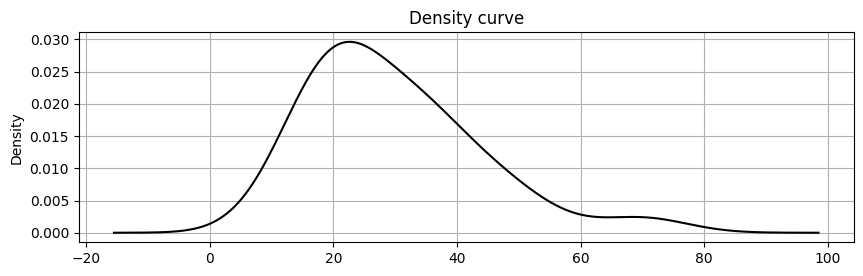

In [24]:
#绘制数据密度曲线
fig=plt.figure(figsize=(10,6))
ax1=fig.add_subplot(2,1,1)
df['Age'].plot(kind='kde',grid=True,style='-k',title='Density curve')

In [26]:
#查找并剔除异常值
ax2=fig.add_subplot(2,1,2)
error=df['Age'][np.abs(df['Age'] -u)>3*std]
data_c=df['Age'][np.abs(df['Age']-u)<=3*std]
len(error)

0

In [31]:
#计算分位差
s = df['Age'].describe()#书上没有这行，就报错了
q1=s['25%']
q3=s['75%']
iqr=q3-q1
mi=q1-1.5*iqr
ma=q3+1.5*iqr
print('分位差为：%.3f，下限为：%.3f,上限为：%.3f'%(iqr,mi,ma))

分位差为：15.250，下限为：-2.875,上限为：58.125


<Axes: >

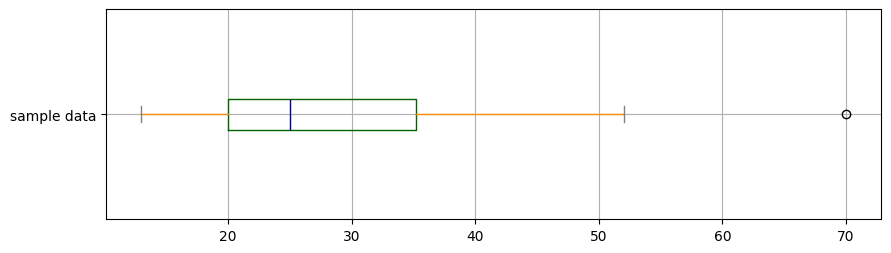

In [32]:
#使用箱型图查看数据分布
fig=plt.figure(figsize=(10,6))
ax1=fig.add_subplot(2,1,1)
color=dict(boxes='DarkGreen',whiskers='DarkOrange',medians='DarkBlue',caps='Gray')
df['Age'].plot.box(vert=False,grid=True,color=color,ax=ax1,label = 'sample data')

In [30]:
#根据分位差的上下限筛选出异常值error,剔除异常值之后的数据为data_c
ax2=fig.add_subplot(2,1,2)
error=df['Age'][(df['Age']<mi)|(df['Age']>ma)]
data_c=df['Age'][(df['Age']>=mi)&(df['Age']<=ma)]
print('异常值共%i条'%len(error))

异常值共1条


（3）其他的数据平滑方法还有移动平均、指数平滑等，之后用到可随时调用此处博客
https://blog.csdn.net/fengdu78/article/details/133874831